In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!git clone https://github.com/koreankiwi99/ada_movie.git
%cd ada_movie

Cloning into 'ada_movie'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), done.
/content/ada_movie/ada_movie


In [19]:
import tarfile
import os
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import json
import sys
import numpy as np
from collections import Counter, defaultdict
import gc
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [20]:
from src.dataset.character import CharacterDataset
from src.dataset.event import EventDataset

# 2 Plot Analysis

We used the BookNLP library to extract NER and coreference data. Due to the time required to analyze all 43,000 plots, this report focuses on a sample of 500 plots. The final report will include the full dataset and provide an analysis of plots categorized by genre and movie nationality.

## 2.1 Gender Count in Plot
We examined the number of characters in each plot by gender and analyzed the frequency of mentions per character, also categorized by gender.

In [21]:
processed_path = Path('/content/drive/MyDrive/ADA/data/processed/')
plot_path_list = sorted(list(processed_path.glob('*')))[:500]

In [22]:
gender_count = []
gender_ratio = []
gender_sum_mention = []
gender_ratio_mention = []

for plot_path in tqdm(plot_path_list):
  data = CharacterDataset(plot_path)
  gender_count.append(data.gender_count)
  gender_ratio.append(data.gender_ratio)
  gender_sum_mention.append(data.gender_sum_mention)
  gender_ratio_mention.append(data.gender_ratio_mention)
  del data
  gc.collect()

100%|██████████| 500/500 [01:41<00:00,  4.93it/s]


In [23]:
gender_count_df = pd.DataFrame(gender_count)
gender_ratio_df = pd.DataFrame(gender_ratio)
gender_sum_mention_df = pd.DataFrame(gender_sum_mention)
gender_ratio_mention_df = pd.DataFrame(gender_ratio_mention)

In [24]:
gender_count_df.fillna(0, inplace=True)
gender_ratio_df.fillna(0, inplace=True)
gender_sum_mention_df.fillna(0, inplace=True)
gender_ratio_mention_df.fillna(0, inplace=True)

### Insights on Gender
- Male characters appear most frequently, with an average count of 2.81 per entry and an average ratio of 0.45, indicating that male characters are more dominant across entries.
- Male character counts have the highest variability (range 1–14), suggesting diverse representation, while female and plural characters tend to appear less frequently and more consistently.

In [25]:
print("Gender Count Summary Statistics:\n", gender_count_df.describe())
print("\nGender Ratio Summary Statistics:\n", gender_ratio_df.describe())

Gender Count Summary Statistics:
            plural      female       male     unknown
count  500.000000  500.000000  500.00000  500.000000
mean     1.458000    1.488000    2.81600    0.736000
std      1.983963    1.638054    2.59685    1.263922
min      0.000000    0.000000    0.00000    0.000000
25%      0.000000    0.000000    1.00000    0.000000
50%      1.000000    1.000000    2.00000    0.000000
75%      2.000000    2.000000    4.00000    1.000000
max     15.000000   10.000000   14.00000    9.000000

Gender Ratio Summary Statistics:
            plural      female        male     unknown
count  500.000000  500.000000  500.000000  500.000000
mean     0.189820    0.235771    0.450046    0.080363
std      0.228186    0.236059    0.294852    0.125965
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.272727    0.000000
50%      0.142857    0.200000    0.458042    0.000000
75%      0.333333    0.385684    0.600000    0.142857
max      1.000000    1

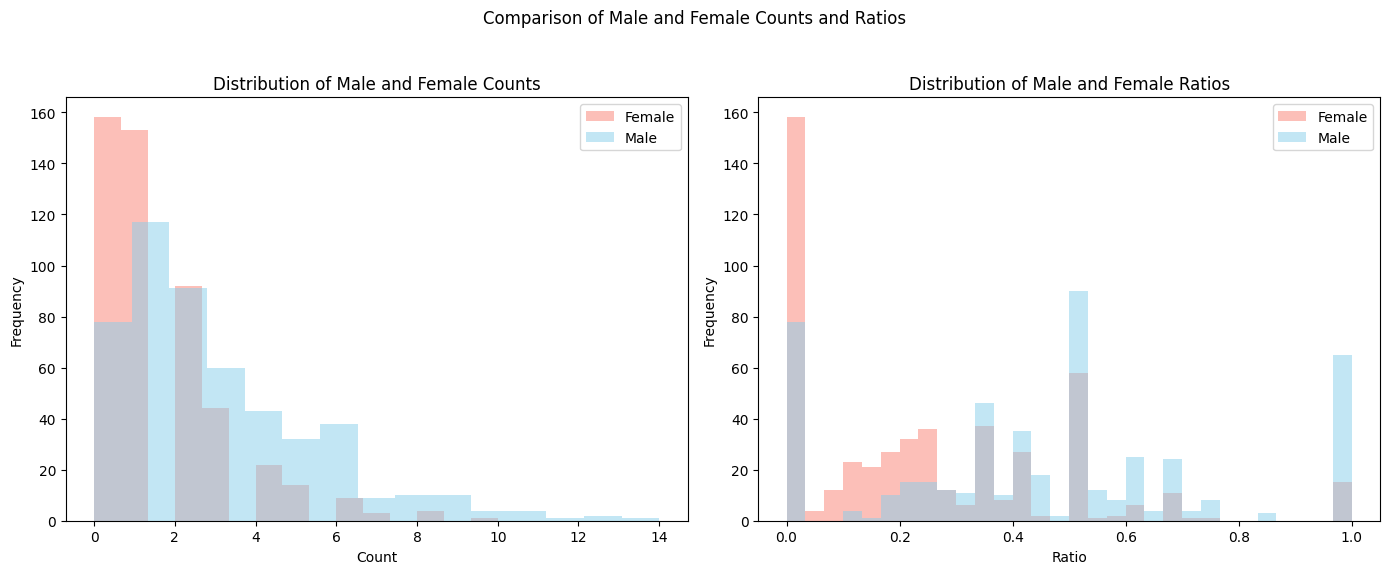

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Comparison of Male and Female Counts and Ratios")

# 1. Overlaid Histograms for Counts
axes[0].hist(gender_count_df['female'], bins=15, alpha=0.5, label='Female', color='salmon')
axes[0].hist(gender_count_df['male'], bins=15, alpha=0.5, label='Male', color='skyblue')
axes[0].set_title("Distribution of Male and Female Counts")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# 2. Overlaid Histograms for Ratios
axes[1].hist(gender_ratio_df['female'], bins=30, alpha=0.5, label='Female', color='salmon')
axes[1].hist(gender_ratio_df['male'], bins=30, alpha=0.5, label='Male', color='skyblue')
axes[1].set_title("Distribution of Male and Female Ratios")
axes[1].set_xlabel("Ratio")
axes[1].set_ylabel("Frequency")
axes[1].legend()

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Insights on Gender Mentions
- Male characters have the highest total (26.42) and average mentions per character (7.37), suggesting a stronger narrative focus on male characters.
- Female characters have lower total and average mentions (11.81 total; 4.96 average), indicating a possible gender disparity in narrative attention.

In [27]:
print("\nGender Sum Mention Summary Statistics:\n", gender_sum_mention_df.describe())
print("\nGender Ratio Mention Summary Statistics:\n", gender_ratio_mention_df.describe())


Gender Sum Mention Summary Statistics:
            plural      female        male     unknown
count  500.000000  500.000000  500.000000  500.000000
mean     5.550000   11.810000   26.426000    1.772000
std      9.674021   19.850895   35.294134    3.239909
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    4.000000    0.000000
50%      2.000000    5.000000   12.000000    0.000000
75%      7.000000   14.000000   36.000000    2.000000
max    116.000000  172.000000  230.000000   26.000000

Gender Ratio Mention Summary Statistics:
            plural      female        male     unknown
count  500.000000  500.000000  500.000000  500.000000
mean     2.054289    4.962940    7.369490    0.936137
std      2.628083    6.216373    7.337663    1.228779
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    3.000000    0.000000
50%      2.000000    3.000000    5.333333    0.000000
75%      3.000000    7.000000    9.762500    2.00000

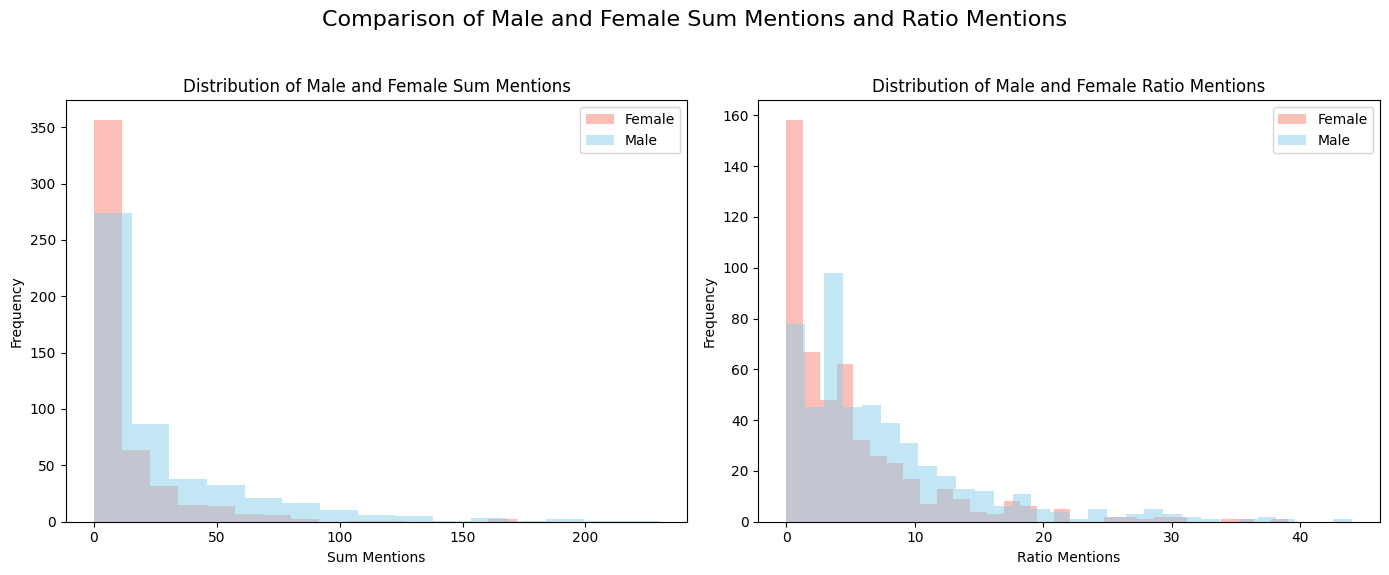

In [28]:
# Plotting male and female comparisons for Sum Mentions and Ratio Mentions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Comparison of Male and Female Sum Mentions and Ratio Mentions", fontsize=16)

# 1. Overlaid Histogram for Sum Mentions
axes[0].hist(gender_sum_mention_df['female'], bins=15, alpha=0.5, label='Female', color='salmon')
axes[0].hist(gender_sum_mention_df['male'], bins=15, alpha=0.5, label='Male', color='skyblue')
axes[0].set_title("Distribution of Male and Female Sum Mentions")
axes[0].set_xlabel("Sum Mentions")
axes[0].set_ylabel("Frequency")
axes[0].legend(loc='upper right')

# 2. Overlaid Histogram for Ratio Mentions
axes[1].hist(gender_ratio_mention_df['female'], bins=30, alpha=0.5, label='Female', color='salmon')
axes[1].hist(gender_ratio_mention_df['male'], bins=30, alpha=0.5, label='Male', color='skyblue')
axes[1].set_title("Distribution of Male and Female Ratio Mentions")
axes[1].set_xlabel("Ratio Mentions")
axes[1].set_ylabel("Frequency")
axes[1].legend(loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 2.2 Related Event Analysis

In [29]:
female_agent_events = []
male_agent_events = []
female_patient_events = []
male_patient_events = []
female_poss_events = []
male_poss_events = []

for plot_path in tqdm(plot_path_list):
  data = EventDataset(plot_path)
  female_agent_events.extend(data.agent_events['female'])
  male_agent_events.extend(data.agent_events['male'])
  female_patient_events.extend(data.patient_events['female'])
  male_patient_events.extend(data.patient_events['male'])
  female_poss_events.extend(data.poss_events['female'])
  male_poss_events.extend(data.poss_events['male'])
  del data
  gc.collect()

100%|██████████| 500/500 [01:47<00:00,  4.66it/s]


In [33]:
def show_wordcloud(male_text : str,
                   female_text : str,
                   title : str,
                   max_words : int = 100):
  wordcloud_female = WordCloud(width=400, height=400, background_color='white', colormap='Reds', max_words=max_words).generate(female_text)
  wordcloud_male = WordCloud(width=400, height=400, background_color='white', colormap='Blues', max_words=max_words).generate(male_text)

  # Display the word clouds side by side
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  fig.suptitle(f"{title} Associated with Female and Male Characters", fontsize=16)

  # Female verbs word cloud
  axes[0].imshow(wordcloud_female, interpolation='bilinear')
  axes[0].set_title("Female Characters")
  axes[0].axis('off')

  # Male verbs word cloud
  axes[1].imshow(wordcloud_male, interpolation='bilinear')
  axes[1].set_title("Male Characters")
  axes[1].axis('off')

  plt.tight_layout()
  plt.show()

### Possessive Words
- With the overlapping words removed, the word cloud analysis of possessive words reveals some thematic associations for female and male characters:

- Female Characters: Words like "pregnancy," "illness," and "stepmother" highlight themes related to relationships, family, and health, suggesting roles centered around personal and familial aspects.
- Male Characters: Words such as "gang," "office," and "music" emphasize social affiliations, activities, and professional roles, pointing to portrayals associated with external, social, and occupational identities.
- These word associations may suggest subtle differences in how male and female characters are depicted, with female characters more often linked to family and personal themes, and male characters to social and professional contexts.

In [46]:
male_only_poss = set(male_poss_events) - set(female_poss_events)
female_only_poss = set(female_poss_events) - set(male_poss_events)
both_poss = set(male_poss_events) & set(female_poss_events)

In [47]:
male_poss_text = ' '.join([_ for _ in male_poss_events if _ in male_only_poss])
female_poss_text = ' '.join([_ for _ in female_poss_events if _ in female_only_poss])

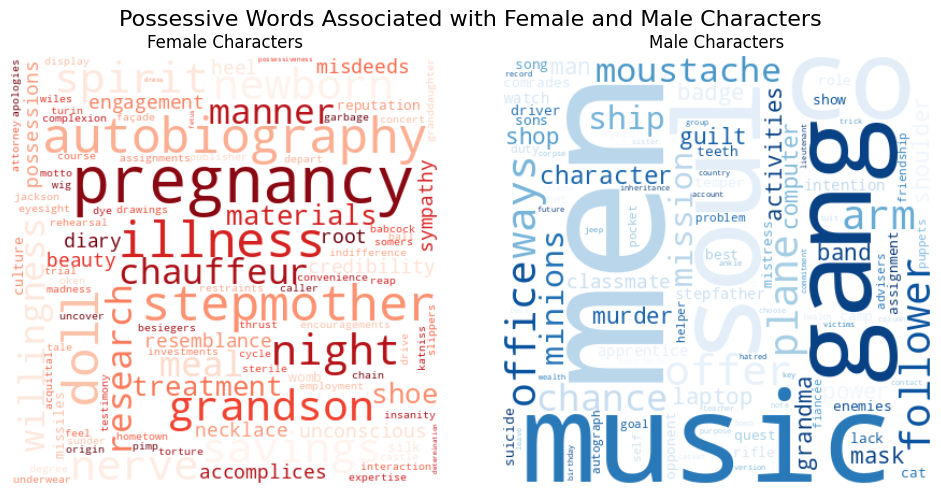

In [52]:
show_wordcloud(male_poss_text,
               female_poss_text,
               "Possessive Words",
               max_words = 100)

### Agent Words
- With the overlapping words removed, the word cloud analysis of agent words reveals additional thematic associations for female and male characters:

- Female Characters: Verbs like "unite," "forgive," and "support" suggest themes of collaboration and care, with some words such as "starve" and "sabotage" hinting at struggle or resilience.
- Male Characters: Words like "prepare," "order," and "capture" emphasize command, control, and action, while "challenge" and "murder" suggest confrontation.




In [56]:
male_only_agent = set(male_agent_events) - set(female_agent_events)
female_only_agent = set(female_agent_events) - set(male_agent_events)
both_agent = set(male_agent_events) & set(female_agent_events)

In [57]:
male_agent_text = ' '.join([_ for _ in male_agent_events if _ in male_only_agent])
female_agent_text = ' '.join([_ for _ in female_agent_events if _ in female_only_agent])

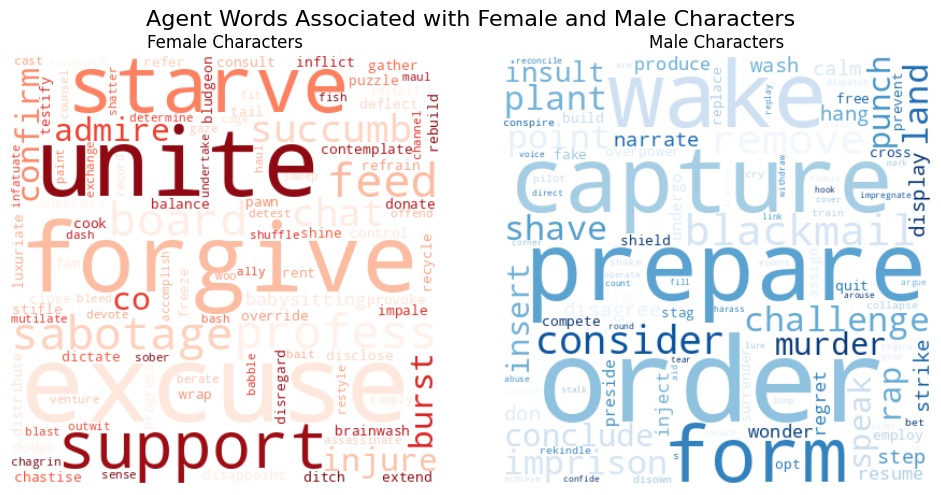

In [58]:
show_wordcloud(male_agent_text, female_agent_text, "Agent Words")

### Patient Words
- With the overlapping words removed, the word cloud analysis of patient words reveals further thematic associations for female and male characters:

- Female Characters: Words like "greet," "desert," "whisk," and "abuse" suggest themes of relational experiences, vulnerability, and abandonment, hinting at situations where female characters are acted upon in personal or relational contexts.
- Male Characters: Words such as "injure," "recruit," "fight," and "challenge" indicate themes of confrontation, control, and conflict, where male characters are often on the receiving end of actions tied to aggression or authority.
- These associations reflect subtle differences in portrayal: female characters are frequently linked to relational and vulnerable experiences, while male characters are depicted in contexts of conflict and exertion of power.

In [59]:
male_only_patient = set(male_patient_events) - set(female_patient_events)
female_only_patient = set(female_patient_events) - set(male_patient_events)
both_patient = set(male_patient_events) & set(female_patient_events)

In [60]:
male_patient_text = ' '.join([_ for _ in male_patient_events if _ in male_only_patient])
female_patient_text = ' '.join([_ for _ in female_patient_events if _ in female_only_patient])

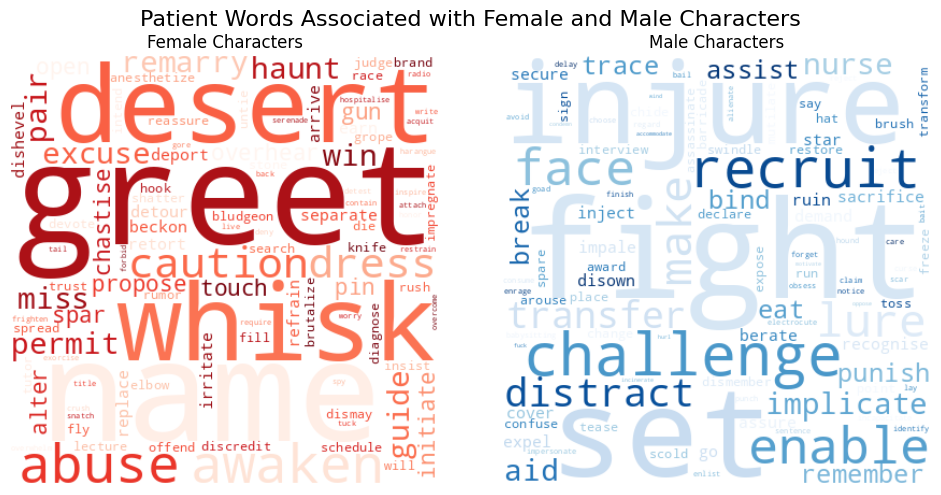

In [61]:
show_wordcloud(male_patient_text, female_patient_text, "Patient Words")

## 2.3. Adjectives

In [ ]:
plot_path_list

## 2.4. Commonsense Inference